In [1]:
url = 'https://ucsb.box.com/shared/static/dnnu59jsnkymup6o8aaovdywrtxiy3a9.csv'

In [2]:
import pandas as pd

In [15]:
df = pd.read_csv(url, parse_dates=['Date'], date_format='%m/%d/%Y %I:%M:%S %p')

In [16]:
df.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,10008,Atlantic Ocean,NaN,NaN,Grab sample,0.020000,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-58.428300,-64.1640,2017-02-03,1e5b8e71-037b-4887-a276-f1e4552acb1f,-64.1640,-58.428300
1,8680,Atlantic Ocean,NaN,NaN,Grab sample,0.008000,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-51.308200,-60.5467,2013-11-17,a40f7f7c-1025-4aac-ad16-ee4cba196870,-60.5467,-51.308200
2,13257,Pacific Ocean,NaN,NaN,Manta net,0.019886,pieces/m3,0.005-1,Medium,Faure et al.2015,...,"Oceaneye Association, Switzerland",Oceaneye Association; Citizen Science,276422,https://www.ncei.noaa.gov/access/metadata/land...,-51.826667,-72.5750,2015-12-26,febf79b8-7e2c-46e6-bc15-e08492ec2029,-72.5750,-51.826667
3,9676,Atlantic Ocean,NaN,NaN,Grab sample,0.018000,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.5600,2015-08-11,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.5600,-31.696000
4,6427,Pacific Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.8500,2002-12-18,be27c450-02ca-4261-8d89-cae21108e6cc,-121.8500,6.350000


In [41]:
df[df['Unit'] == 'pieces/m3']['Measurement'].agg(['max'])

max    110480.0
Name: Measurement, dtype: float64

In [44]:
df.groupby(['Oceans'])['Measurement'].mean()

Oceans
Arctic Ocean        1.916192
Atlantic Ocean    202.347671
Pacific Ocean     452.918721
Southern Ocean      0.068133
Name: Measurement, dtype: float64

In [45]:
df2 = df[df['Unit'] == 'pieces/m3']

<Axes: >

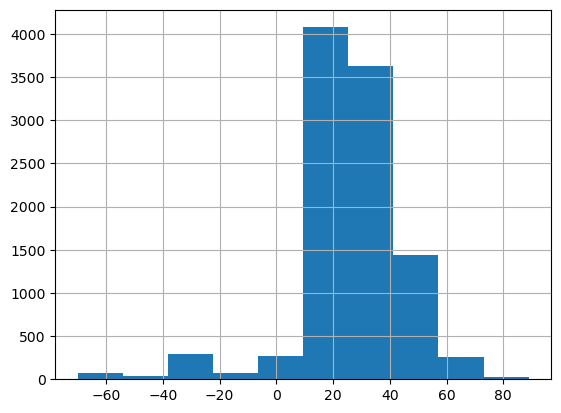

In [49]:
df2['Latitude'].hist()

<Axes: xlabel='Date'>

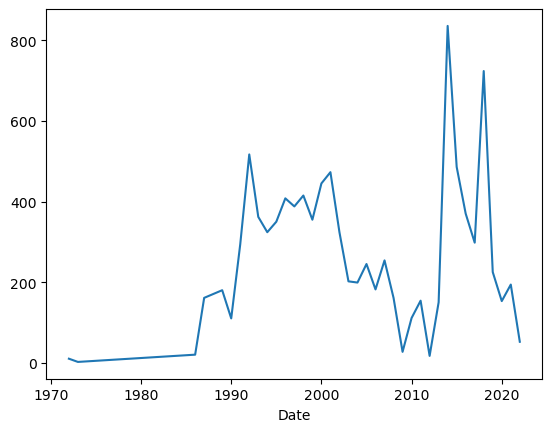

In [58]:
df2['Date'].dt.year.value_counts().sort_index().plot.line()

<Axes: xlabel='Date'>

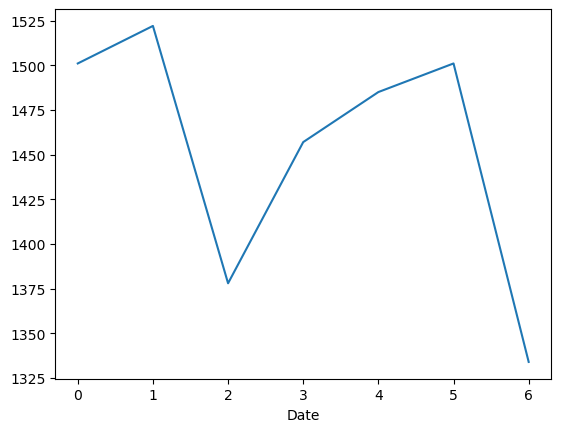

In [64]:
df2['Date'].dt.weekday.value_counts().sort_index().plot.line()

In [65]:
oceans = df.groupby(['Oceans'])

In [68]:
oceans['Measurement'].mean()

Oceans
Arctic Ocean        1.916192
Atlantic Ocean    202.347671
Pacific Ocean     452.918721
Southern Ocean      0.068133
Name: Measurement, dtype: float64

In [73]:
df2 = df[df['Unit'] == 'pieces/m3']

Oceans
Arctic Ocean          63.000000
Atlantic Ocean    110480.000000
Pacific Ocean      21156.558533
Southern Ocean         0.499663
Name: Measurement, dtype: float64

In [74]:
df2 = df[(df['Unit'] == 'pieces/m3') & (df['Measurement'] > 0)]